In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from gpmap.simulate import MountFujiSimulation
from gpmap.simulate.mask import mask
from epistasis.models import EpistasisLinearRegression



length = 5
sim = MountFujiSimulation.from_length(length, field_strength=-1)
sim.set_roughness((-1,1))
sim.stdeviations = np.ones(sim.n) * 0.05

x, gpm = mask(sim, 0.60)
test_model = EpistasisLinearRegression.read_gpm(gpm, order=1, model_type='local')
test_model.fit()
1 - test_model.score()

0.069291264199613289

In [2]:
from epistasis.models import EpistasisLinearRegression

order = length
model = EpistasisLinearRegression(order=2, model_type='local')

In [3]:
from gpseer import GPSeer 
from dask.distributed import Client

In [4]:
client = Client()

bins = np.arange(0,10, .1)
seer = GPSeer(gpm, model, bins=bins, client=client)

In [5]:
n_samples = 10
seer.sample_pipeline(n_samples)

In [6]:
r = seer.results

In [7]:
r

,MDRNN,MDRNV,MDRYN,MDVYN,MDVYV,MLRNN,MLRNV,MLRYN,MLVNN,MLVYN,MLVYV,TDRYN,TDRYV,TDVNN,TDVYN,TLRNN,TLRNV,TLVNN,TLVNV,TLVYN
max_likelihood,5.882770,4.348563,3.817526,2.293488,1.156493,6.130596,4.510034,4.296713,3.336906,2.690592,1.467242,2.234718,0.984049,1.719617,1.386213,3.321099,2.070429,1.202941,0.435838,1.100898
0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.882590,0.000000
0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.902422,0.000000
0.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.368169,0.000000
0.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,108.290237,0.000000
0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,175.991394,0.000000
0.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.296409,0.000000
0.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031046,0.045948,0.000000
0.8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000373,0.000000,0.000000,0.000000,0.000000,1.030729,0.000000,0.000000
0.9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.477426,0.000000,0.000000,0.000000,0.000000,0.912754,0.000000,0.000000


tornado.application - ERROR - Exception in callback <bound method SystemMonitor.update of <SystemMonitor: cpu: 100 memory: 17 MB fds: 216>>
Traceback (most recent call last):
  File "/Users/Zsailer/miniconda3/envs/gpseer/lib/python3.6/site-packages/tornado/ioloop.py", line 1026, in _run
    return self.callback()
  File "/Users/Zsailer/miniconda3/envs/gpseer/lib/python3.6/site-packages/distributed/system_monitor.py", line 56, in update
    ioc = psutil.net_io_counters()
  File "/Users/Zsailer/miniconda3/envs/gpseer/lib/python3.6/site-packages/psutil/__init__.py", line 2089, in net_io_counters
    raise RuntimeError("couldn't find any network interface")
RuntimeError: couldn't find any network interface


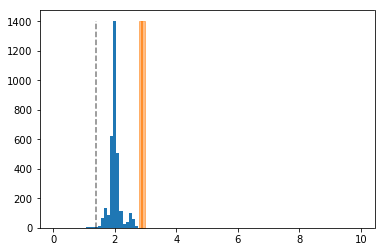

In [19]:
g = r.columns[0]
m = sim.map('genotypes', 'phenotypes')
me = sim.map('genotypes', 'std.upper')

ymin, ymax = r[g].min(), r[g].max()

fig, ax = plt.subplots()
ax.bar(r.index[1:], r[g][1:], width=.1, alpha=1)
ax.vlines(r[g][0], ymin, ymax, linestyle='--', alpha=0.5)
ax.vlines(m[g], ymin, ymax, linestyle='-', color='C1')
ax.fill_betweenx([ymin, ymax], m[g]-2*me[g], 2*me[g]+m[g], color='C1', alpha=0.5)